Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consist of images of 9 types of different skin cancers namely 
* Actinic keratosis
* Basal cell carcinoma
* Dermatofibroma
* Melanoma
* Nevus
* Pigmented benign keratosis
* Seborrheic keratosis
* Squamous cell carcinoma
* Vascular lesion

The model should be accurately predict melonoma cancer.


### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images

data_dir_train = pathlib.Path("/content/gdrive/MyDrive/cnn_assignment data/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/cnn_assignment data/Skin cancer ISIC The International Skin Imaging Collaboration/Test')


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Preparing Dataset

Defining some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
##  Train dataset

train_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## validation dataset

val_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
## Test Dataset 

test_ds = keras.preprocessing.image_dataset_from_directory(data_dir_test,
                                                               seed=123,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb')

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list. 

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualizing data 

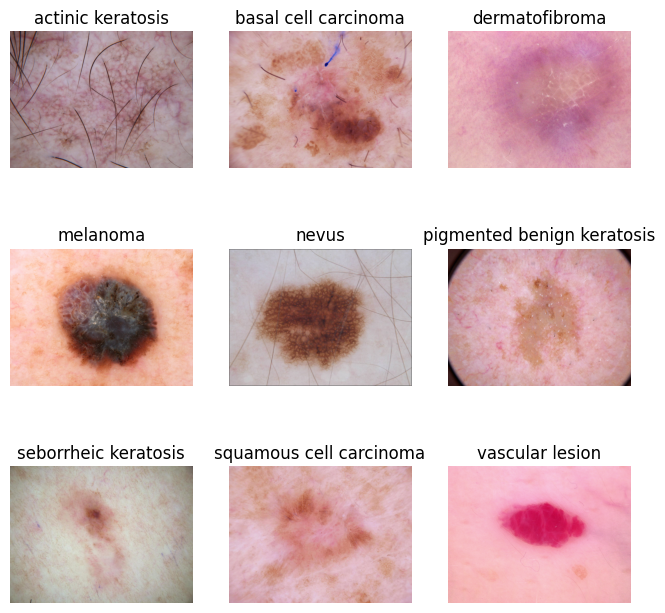

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  image = plt.imread(list(data_dir_train.glob(class_names[i]+"*/*.jpg"))[0])
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis("off")
#plt.tight_layout()
plt.show()
### your code goes here, you can use training or validation data to visualize

### Optimizing processes using Autotune

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Defining function to visualize the trade off between train and validation accuracy with respect to distinct epochs

In [12]:
def plot_tradeoff(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
model=keras.Sequential()

model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())


model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 259200)            0

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 349s 1s/step - loss: 3.4397 - accuracy: 0.2360 - val_loss: 2.3143 - val_accuracy: 0.2371
Epoch 2/20
56/56 [==============================] - 4s 68ms/step - loss: 1.6612 - accuracy: 0.4386 - val_loss: 1.4987 - val_accuracy: 0.5168
Epoch 3/20
56/56 [==============================] - 4s 69ms/step - loss: 1.4027 - accuracy: 0.5195 - val_loss: 1.4953 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 4s 66ms/step - loss: 1.2935 - accuracy: 0.5480 - val_loss: 1.3916 - val_accuracy: 0.5347
Epoch 5/20
56/56 [==============================] - 4s 68ms/step - loss: 1.1926 - accuracy: 0.5826 - val_loss: 1.4379 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 4s 67ms/step - loss: 1.0653 - accuracy: 0.6345 - val_loss: 1.3859 - val_accuracy: 0.5481
Epoch 7/20
56/56 [==============================] - 4s 68ms/step - loss: 0.9776 - accuracy: 0.6652 - val_loss: 1.5689 - val_accuracy: 0.5369
Epoch 8/20
56

### Visualizing training results

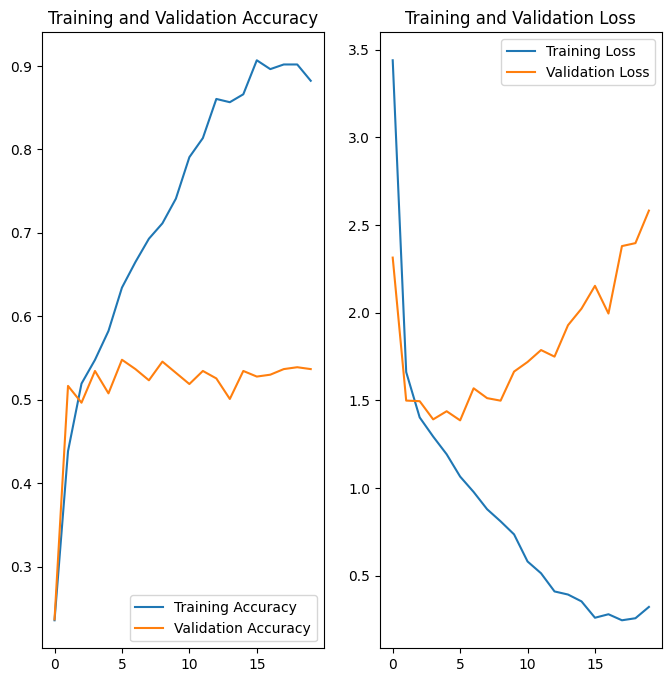

In [17]:
plot_tradeoff(history,epochs)

Some of the important findings from the initial model 
- Difference in training accuracy and validation accuracy after 20 epochs indicate the overfitting of model. 

- In the initial 4-5 epochs can be place where the model can be stopped learning as the overfitting starts after 4 epochs. 

- But stopping at 4-5 has less accuracy around 50% almost a random model. 

- Hence, we address overfitting by adding dropout layers and batch normalization layers. 

### Write your findings here

In [18]:
# data augumentation strategy
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model=keras.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# adding the augmentation layer before the convolution layer
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 76ms/step - loss: 3.5790 - accuracy: 0.2483 - val_loss: 1.8941 - val_accuracy: 0.3691
Epoch 2/20
56/56 [==============================] - 4s 69ms/step - loss: 1.7850 - accuracy: 0.3711 - val_loss: 1.8780 - val_accuracy: 0.4004
Epoch 3/20
56/56 [==============================] - 4s 71ms/step - loss: 1.5675 - accuracy: 0.4453 - val_loss: 1.4332 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 4s 73ms/step - loss: 1.4314 - accuracy: 0.4922 - val_loss: 1.5326 - val_accuracy: 0.4720
Epoch 5/20
56/56 [==============================] - 4s 68ms/step - loss: 1.4111 - accuracy: 0.4916 - val_loss: 1.3494 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 4s 68ms/step - loss: 1.3846 - accuracy: 0.5028 - val_loss: 1.4154 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 4s 72ms/step - loss: 1.3336 - accuracy: 0.5100 - val_loss: 1.4006 - val_accuracy: 0.5190
Epoch 8/20
56

### Visualizing the results

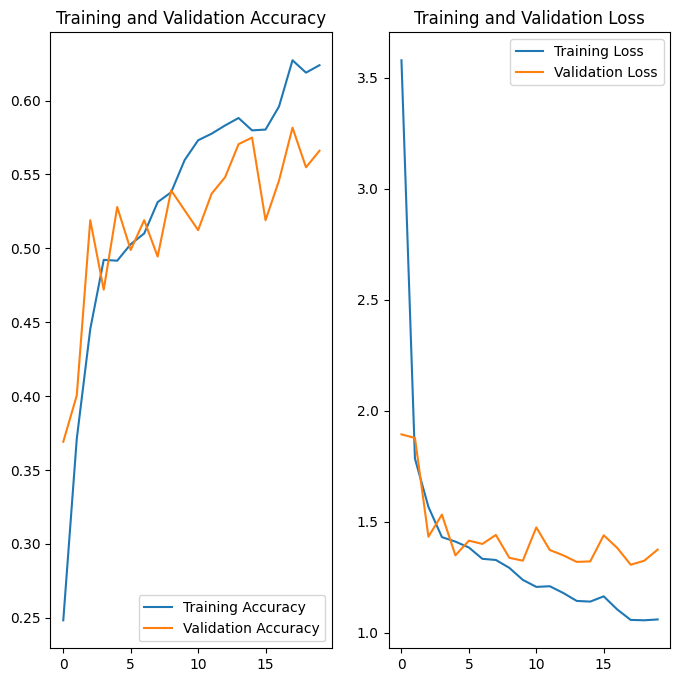

In [22]:
plot_tradeoff(history,epochs)

###** Note **
- Data Augmentation layer did address the issue of overfitting till some extent 
- Learning of model is yet to be improved. 
- Nearby 10 epochs we have optimum loss as well as nearby same train and validation accuracy but again the model is slightly better than random model. 
- Hence, we look at the distribution of class and try to address data imbalance if exist. 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

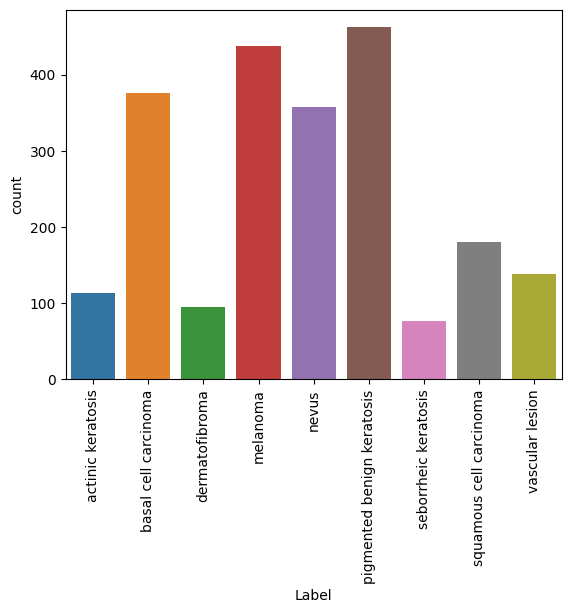

In [23]:
## Your code goes here.
import seaborn as sns
paths =[]
labels = []
for i in class_names:
      for j in data_dir_train.glob(i+'/*.jpg'):
        paths.append(str(j))
        labels.append(i)
dataframe = dict(zip(paths, labels))
original_df = pd.DataFrame(list(dataframe.items()),columns = ['Path','Label'])
sns.countplot(data=original_df,x='Label')
plt.xticks(rotation=90)
plt.show()

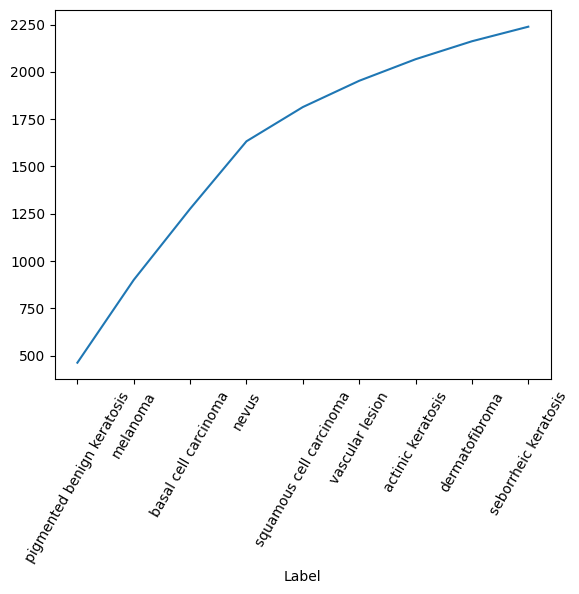

In [24]:
ana = original_df.groupby(by='Label').count()
np.cumsum(ana.Path.sort_values(ascending=False)).plot()
plt.xticks(rotation=60)
plt.show()

**Note**:
- Pigmented Beign Keratosis, melanoma and basel cell carcinoma accounts for around 60% of the data.
- Seborrheic keratosis has the least amount of images. 
- Seborrheic constitute of around 4% data only where as 22% resuting in huge data imbalance. 
- In an ideal state (uniform distribution) we should have around 250 images for each class. 
- Hence, we address the issue of data imbalance using augmentor package

In [25]:
!pip install Augmentor
import Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
direc_ = pathlib.Path("/content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/") 

for i in class_names:
    for class_directory in direc_.iterdir():
      if class_directory.is_dir():
        for file_path in class_directory.iterdir():
            if file_path.is_file():
                os.remove(file_path)

In [27]:
path_to_training_dataset="/content/gdrive/MyDrive/cnn_assignment data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+i,output_directory="/content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/"+i+"/")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/actinic keratosis/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB0F01FAE90>: 100%|██████████| 500/500 [00:21<00:00, 23.60 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/basal cell carcinoma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB142D84E20>: 100%|██████████| 500/500 [00:22<00:00, 22.37 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/dermatofibroma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB150449E10>: 100%|██████████| 500/500 [00:22<00:00, 21.84 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/melanoma/.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7FB1502AC940>: 100%|██████████| 500/500 [01:52<00:00,  4.44 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/nevus/.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FB1600CAA40>: 100%|██████████| 500/500 [01:34<00:00,  5.28 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/pigmented benign keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB1600EF760>: 100%|██████████| 500/500 [00:22<00:00, 22.46 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/seborrheic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB1600ECBB0>: 100%|██████████| 500/500 [00:50<00:00,  9.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/squamous cell carcinoma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB0F0209C00>: 100%|██████████| 500/500 [00:21<00:00, 22.74 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/vascular lesion/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB150336920>: 100%|██████████| 500/500 [00:22<00:00, 22.60 Samples/s]


Augmentor has stored the augmented images in the Balanced dataset directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [28]:
from pathlib import Path

data_dir_train = Path("/content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)


4500


### Lets see the distribution of augmented data after adding new images to the original training data.

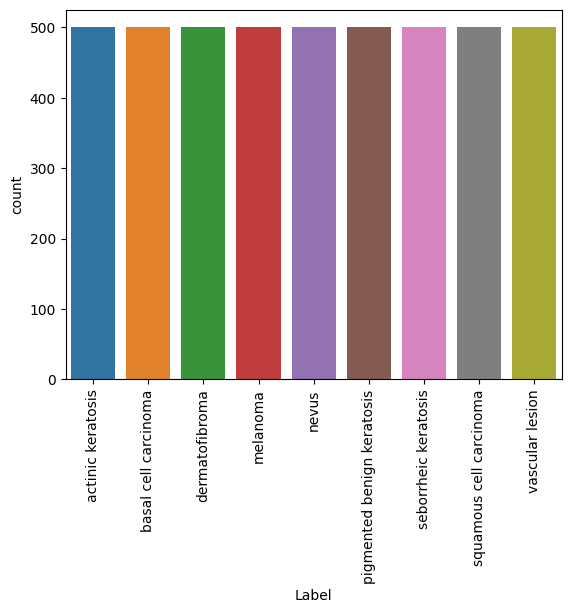

In [29]:
data_dir_train = Path("/content/gdrive/MyDrive/cnn_assignment data/balanced_dataset/")
paths =[]
labels = []
for i in class_names:
      for j in data_dir_train.glob(i+'/*.jpg'):
        paths.append(str(j))
        labels.append(i)
dataframe = dict(zip(paths, labels))
original_df = pd.DataFrame(list(dataframe.items()),columns = ['Path','Label'])
sns.countplot(data=original_df,x='Label')
plt.xticks(rotation=90)
plt.show()

In [30]:
original_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Initiating some parameters 

In [31]:
batch_size = 32
img_height = 180
img_width = 180

### Training dataset

In [32]:
data_dir_train="/content/gdrive/MyDrive/cnn_assignment data/balanced_dataset"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


### validation dataset

In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


### Building the model on new dataset 

In [34]:
# CNN Model
model=keras.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [35]:
#Compilation of model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

#### Training the model on resampled data 

In [36]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 24s 185ms/step - loss: 2.1510 - accuracy: 0.2739 - val_loss: 1.8211 - val_accuracy: 0.2711
Epoch 2/30
113/113 [==============================] - 20s 169ms/step - loss: 1.5300 - accuracy: 0.4186 - val_loss: 1.4739 - val_accuracy: 0.4500
Epoch 3/30
113/113 [==============================] - 21s 176ms/step - loss: 1.4213 - accuracy: 0.4658 - val_loss: 1.5890 - val_accuracy: 0.3956
Epoch 4/30
113/113 [==============================] - 20s 165ms/step - loss: 1.3348 - accuracy: 0.5047 - val_loss: 1.3273 - val_accuracy: 0.5089
Epoch 5/30
113/113 [==============================] - 21s 174ms/step - loss: 1.2828 - accuracy: 0.5167 - val_loss: 1.2552 - val_accuracy: 0.5489
Epoch 6/30
113/113 [==============================] - 19s 164ms/step - loss: 1.2199 - accuracy: 0.5475 - val_loss: 1.3190 - val_accuracy: 0.4922
Epoch 7/30
113/113 [==============================] - 22s 183ms/step - loss: 1.2028 - accuracy: 0.5456 - val_loss: 1.3215 - val_ac

 ### Visualizing model results

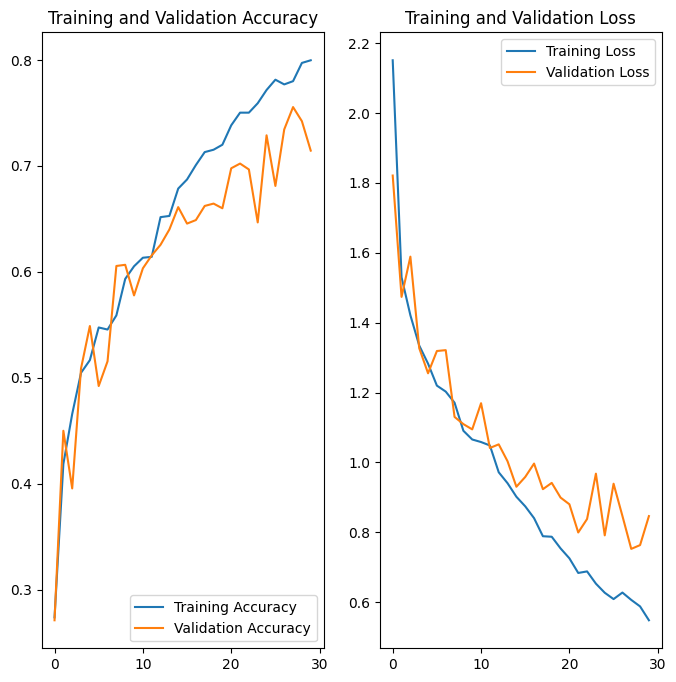

In [37]:
plot_tradeoff(history,epochs)

#### Observations
- Resampling using augmentor pipeline actually solved the problem of overfitting.
- It also increased the accuracy of the model to about 72%. 

